In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import auc, average_precision_score
from pylab import rcParams
import seaborn as sns

In [2]:
sns.set()
rcParams['figure.figsize'] = 12, 8

# Physical and chemical propertires based model

## ROC AUC

In [3]:
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Shuffle__Phys-Chem-Struct.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__Phys-Chem-Struct.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv')
# Add more experiments here

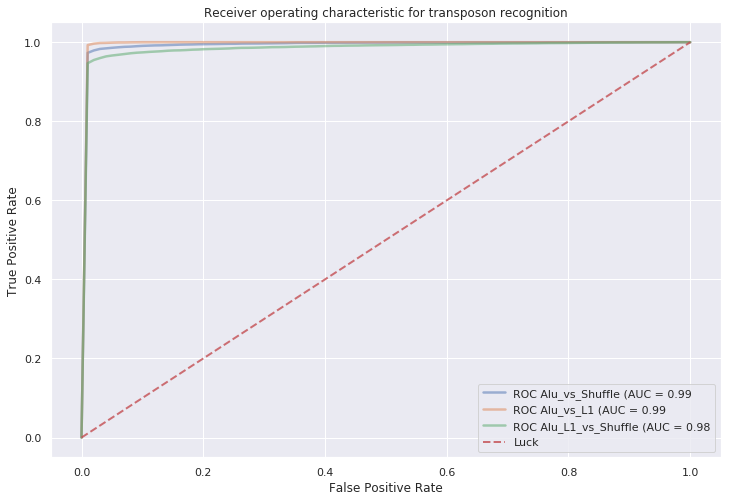

In [4]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=.8
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [5]:
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Shuffle__Phys-Chem-Struct.csv', index_col=0)
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__Phys-Chem-Struct.csv', index_col=0)
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv', index_col=0)
# Add more experiments here

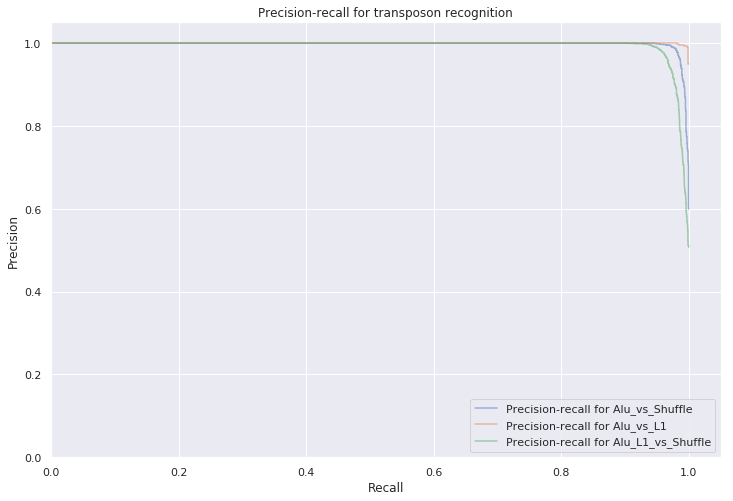

In [6]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.5,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [7]:
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Shuffle__Phys-Chem-Struct.csv', index_col=0)
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__Phys-Chem-Struct.csv', index_col=0)
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Shuffle__Phys-Chem-Struct.csv', index_col=0)
# Add more experiments here

In [8]:
top_features = pd.unique(pd.concat([
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1)
to_plot_df.columns=[
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
]
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


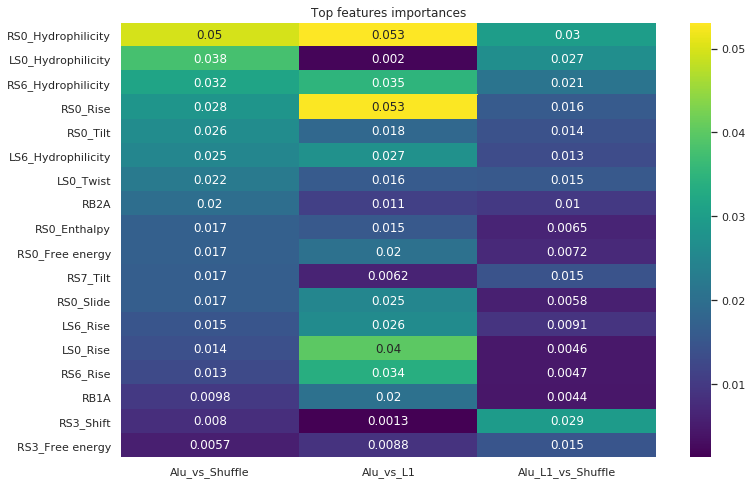

In [9]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='viridis')
ax.set_title('Top features importances')
pass

# 50 bp statistical model

## ROC AUC

In [10]:
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Random__50b.p._Stats.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__50b.p._Stats.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Random__50b.p._Stats.csv')
# Add more experiments here

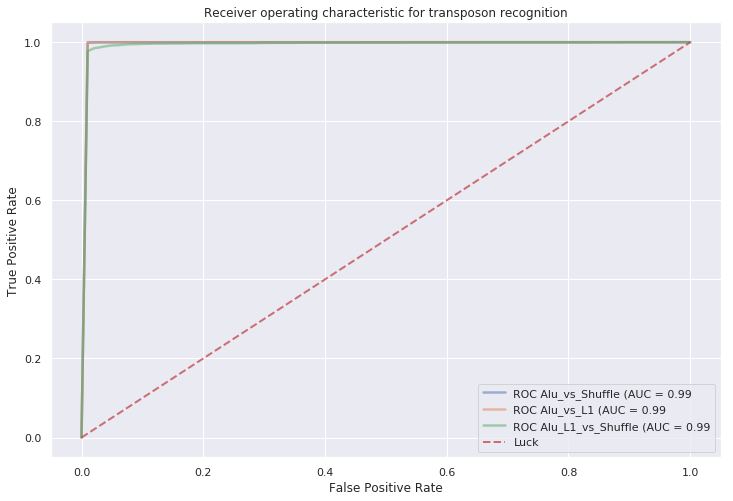

In [11]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=.8
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [12]:
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Random__50b.p._Stats.csv', index_col=0)
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__50b.p._Stats.csv', index_col=0)
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Random__50b.p._Stats.csv', index_col=0)
# Add more experiments here

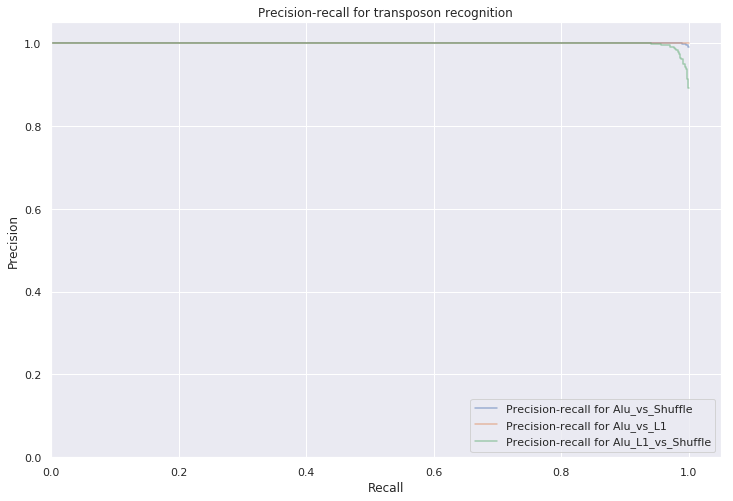

In [13]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.5,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [14]:
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Random__50b.p._Stats.csv', index_col=0)
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__50b.p._Stats.csv', index_col=0)
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Random__50b.p._Stats.csv', index_col=0)
# Add more experiments here

In [15]:
top_features = pd.unique(pd.concat([
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1)
to_plot_df.columns=[
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
]
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


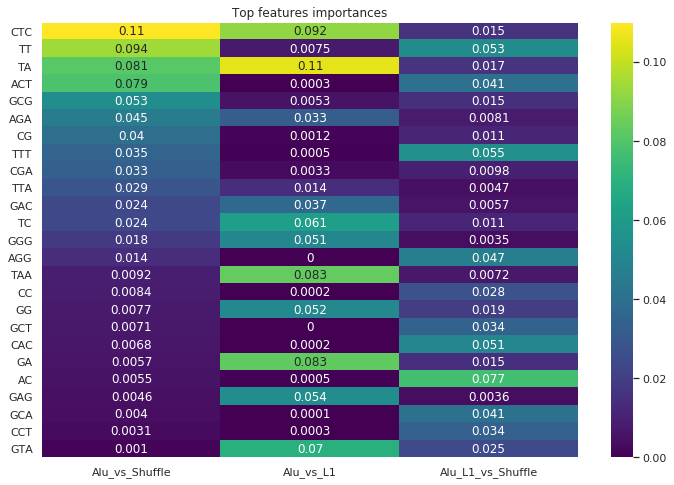

In [16]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='viridis')
ax.set_title('Top features importances')
pass

# Stem-loop statistical model

## ROC AUC

In [17]:
auc_alu_vs_random = pd.read_csv('Alu/AUC__Alu_vs_Shuffle__Stem-loop_Stats.csv')
auc_alu_vs_l1 = pd.read_csv('Alu/AUC__Alu_vs_L1__Stem-loop_Stats.csv')
auc_alu_l1_vs_random = pd.read_csv('Alu/AUC__Alu_L1_vs_Shuffle__Stem-loop_Stats.csv')
# Add more experiments here

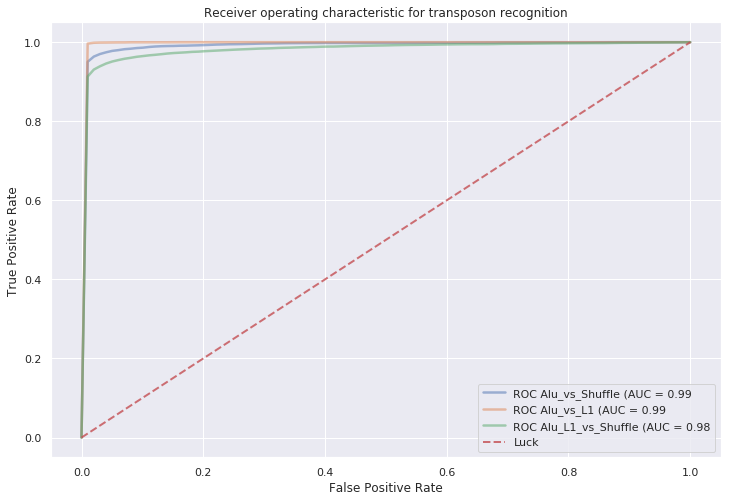

In [18]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    auc_alu_vs_random,
    auc_alu_vs_l1,
    auc_alu_l1_vs_random,
    # Add more experiments here
]):
    auc_score = auc(df.fpr, df.tpr)
    plt.plot(
        df.fpr,
        df.tpr,
        lw=2.5,
        alpha=0.5,
        label=f'ROC {name} (AUC = {auc_score:0.2f}'
    )
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    lw=2,
    color='r',
    label='Luck',
    alpha=.8
)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Precision recall

In [19]:
pr_alu_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_vs_Shuffle__Stem-loop_Stats.csv', index_col=0)
pr_alu_vs_l1 = pd.read_csv('Alu/Precision-Recall__Alu_vs_L1__Stem-loop_Stats.csv', index_col=0)
pr_alu_l1_vs_random = pd.read_csv('Alu/Precision-Recall__Alu_L1_vs_Shuffle__Stem-loop_Stats.csv', index_col=0)
# Add more experiments here

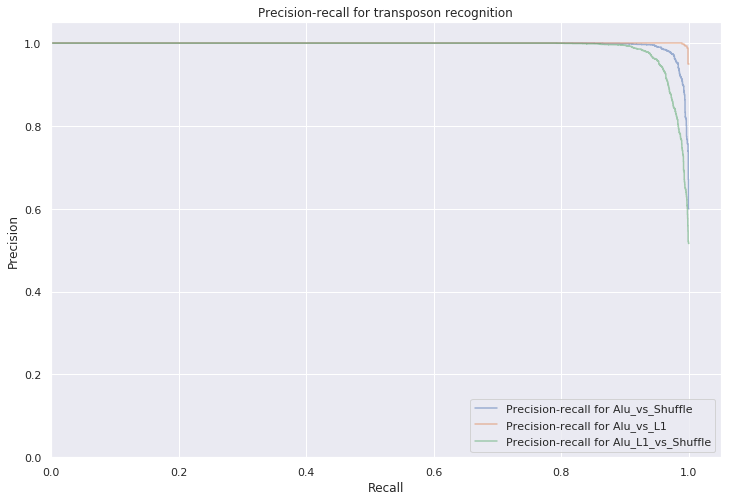

In [20]:
for name, df in zip([
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
],[
    pr_alu_vs_random,
    pr_alu_vs_l1,
    pr_alu_l1_vs_random,
    # Add more experiments here
]):
    plt.step(
        df.recall,
        df.precision,
        alpha=0.5,
        where='post',
        label=f'Precision-recall for {name}'
    )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('Precision-recall for transposon recognition')
plt.legend(loc="lower right")
plt.show()

## Feature importances

In [21]:
fi_alu_vs_random = pd.read_csv('Alu/Feature_importance__Alu_vs_Shuffle__Stem-loop_Stats.csv', index_col=0)
fi_alu_vs_l1 = pd.read_csv('Alu/Feature_importance__Alu_vs_L1__Stem-loop_Stats.csv', index_col=0)
fi_alu_l1_vs_random = pd.read_csv('Alu/Feature_importance__Alu_L1_vs_Shuffle__Stem-loop_Stats.csv', index_col=0)
# Add more experiments here

In [22]:
top_features = pd.unique(pd.concat([
    fi_alu_vs_random.iloc[:10],
    fi_alu_vs_l1.iloc[:10],
    fi_alu_l1_vs_random.iloc[:10],
    # Add more experiments here
]).Feature_name)
to_plot_df = pd.concat([
    fi_alu_vs_random[fi_alu_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_vs_l1[fi_alu_vs_l1.Feature_name.isin(top_features)].set_index('Feature_name'),
    fi_alu_l1_vs_random[fi_alu_l1_vs_random.Feature_name.isin(top_features)].set_index('Feature_name'),
    # Add more experiments here
], axis=1)
to_plot_df.columns=[
    'Alu_vs_Shuffle',
    'Alu_vs_L1',
    'Alu_L1_vs_Shuffle',
    # Add more experiments here
]
to_plot_df = to_plot_df.sort_values(to_plot_df.columns[0], ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


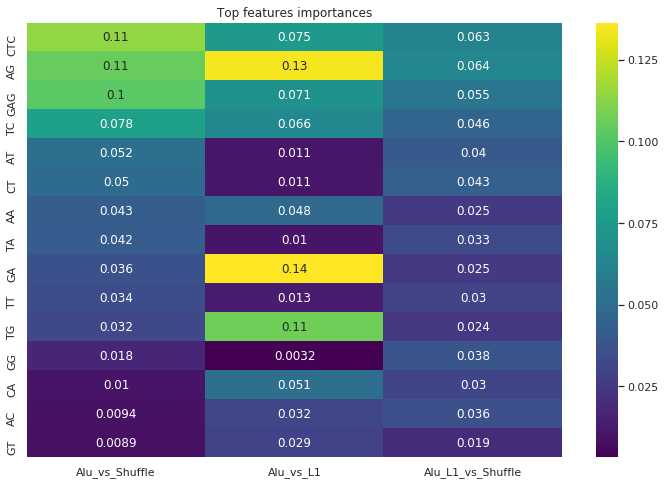

In [23]:
ax = plt.axes()
sns.heatmap(to_plot_df, annot=True, cmap='viridis')
ax.set_title('Top features importances')
pass